# Train Eval Baseline for CelebA Dataset
---

## Import Libraries

In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch.optim as opt
from torch.utils.data import DataLoader

from disenn.datasets.celeba_dataset import CelebA
from disenn.models.conceptizers import VaeConceptizer
from disenn.models.losses import BVAE_Loss

## Load Data

In [3]:
celeba_dataset = CelebA(split='train', data_path='data/celeba')

In [4]:
train_dl = DataLoader(celeba_dataset, batch_size=32, shuffle=True)

In [5]:
x,y = next(iter(train_dl))

# Test Conceptizer API

## Forward Pass Check

In [6]:
conceptizer = VaeConceptizer(num_concepts=10)

In [7]:
concept_mean, concept_logvar, x_reconstruct = conceptizer(x)

In [8]:
x.shape

torch.Size([32, 3, 64, 64])

In [9]:
concept_mean.shape, concept_logvar.shape

(torch.Size([32, 10]), torch.Size([32, 10]))

In [10]:
x_reconstruct.shape

torch.Size([32, 3, 64, 64])

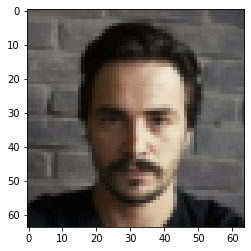

In [11]:
plt.imshow(x[0].numpy().transpose(1,2,0))

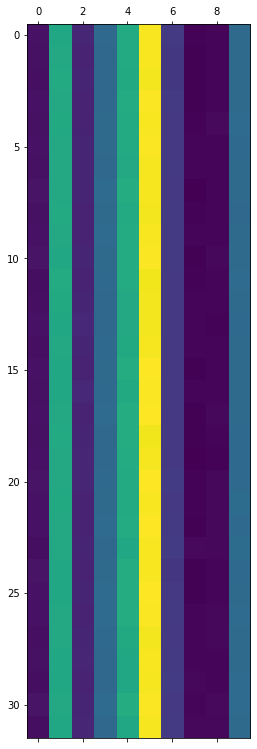

In [12]:
plt.matshow(concept_mean.detach().numpy())

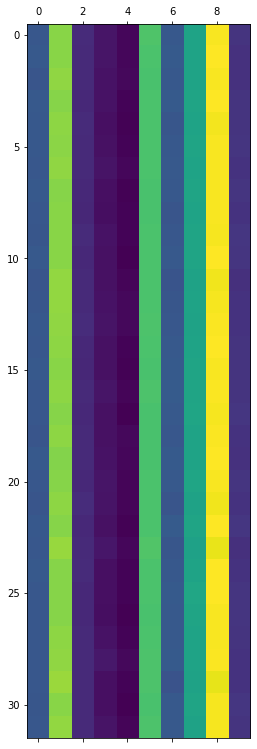

In [13]:
plt.matshow(concept_logvar.detach().numpy())

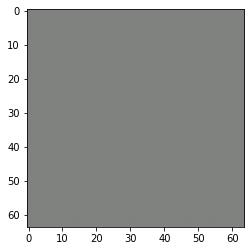

In [14]:
plt.imshow(x_reconstruct[0].detach().numpy().transpose(1,2,0))

## Learning Check

In [15]:
optimizer = opt.Adam(conceptizer.parameters())
conceptizer.train()

VaeConceptizer(
  (encoder): ConvEncoder(
    (conv_block): Sequential(
      (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): ReLU()
      (6): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (7): ReLU()
    )
    (fc_block): Sequential(
      (0): Linear(in_features=512, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
    )
    (mu_logvar_layer): Linear(in_features=256, out_features=20, bias=True)
  )
  (decoder): ConvDecoder(
    (fc_block): Sequential(
      (0): Linear(in_features=10, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=5

In [16]:
EPOCHS = 1
BETA = 1
PRINT_FREQ = 100

In [17]:
for epoch in range(EPOCHS):
    for i, (x, _) in enumerate(train_dl):
        optimizer.zero_grad()
        x = x.float()
        concept_mean, concept_logvar, x_reconstruct = conceptizer(x)
        recon_loss, kl_div = BVAE_Loss(x, x_reconstruct, concept_mean, concept_logvar)
        loss = recon_loss + BETA * kl_div
        loss.backward()
        optimizer.step()
        if i % PRINT_FREQ == 0:
            print(f"EPOCH:{epoch} STEP:{i} \t"
                  f"Concept Loss: {loss:.3f} "
                  f"Recon Loss: {recon_loss:.3f} "
                  f"KL Div: {kl_div}")

EPOCH:0 STEP:0 	Concept Loss: 0.461 Recon Loss: 0.089 KL Div: 0.3724554479122162
EPOCH:0 STEP:100 	Concept Loss: 0.079 Recon Loss: 0.079 KL Div: 5.662441253662109e-07
EPOCH:0 STEP:200 	Concept Loss: 0.089 Recon Loss: 0.089 KL Div: 7.748603820800781e-07
EPOCH:0 STEP:300 	Concept Loss: 0.082 Recon Loss: 0.082 KL Div: 1.1920928955078125e-07
EPOCH:0 STEP:400 	Concept Loss: 0.086 Recon Loss: 0.086 KL Div: 6.854534149169922e-07


KeyboardInterrupt: 

In [18]:
conceptizer.eval();

In [19]:
concept_mean, concept_logvar, x_reconstruct = conceptizer(x)

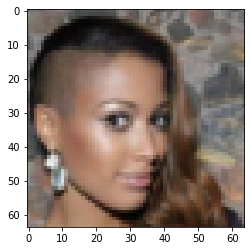

In [20]:
plt.imshow(x[2].numpy().transpose(1,2,0))

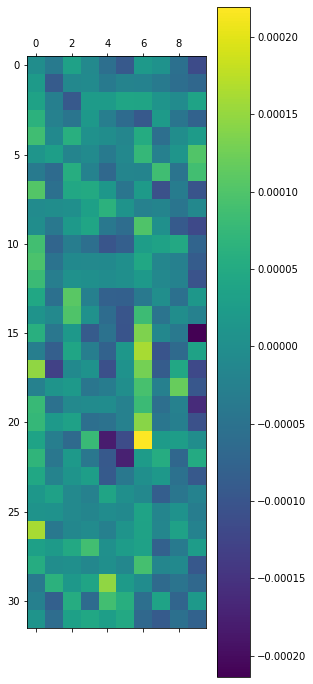

In [24]:
plt.matshow(concept_mean.detach().numpy())
plt.colorbar()

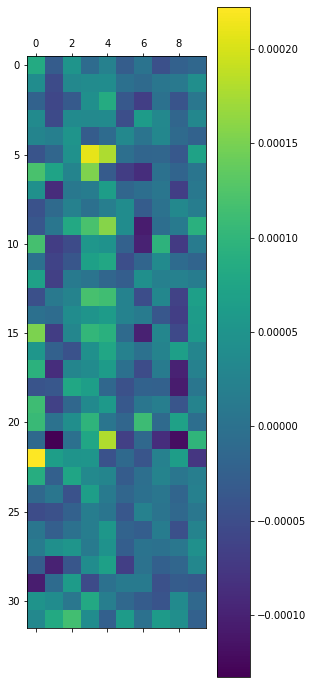

In [25]:
plt.matshow(concept_logvar.detach().numpy())
plt.colorbar()

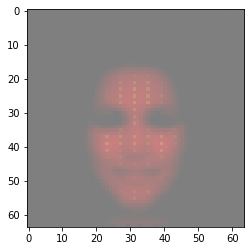

In [23]:
plt.imshow(x_reconstruct[9].detach().numpy().transpose(1,2,0))